# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?


The business goal was to increase the efficiency of directed marketing campaigns for long-term deposit subscriptions by reducing the number of contacts made while maintaining or improving the number of successful deposit subscriptions. This involved building a model to predict which customers would be more likely to subscribe to the deposit product, thereby optimizing the use of resources such as human effort, phone calls, and time

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [40]:
import pandas as pd
import numpy as np

import time
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score

from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay


In [16]:
# for window
df = pd.read_csv(r'C:\Users\Duy Nguyen\Downloads\module_17_starter\data\bank-additional.csv', sep = ';')

# for mac
df = pd.read_csv('/Users/ihduynguyen/Downloads/module_17_starter/data/bank-additional.csv', sep = ';')

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### MIssing Value

In [18]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Generate statistical summaries for numeric columns
numeric_summary = df.describe()

# Display results
missing_values


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
numeric_summary

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


1. Average age is around 40 years old. Standard deviation is about 10 years
2. Average call duration is approximately 257 seconds, with high variance range from 0 - 3643 seconds
3. During the campaign the client contacted 2.54 times on average
4. 999 days has passed since the last campaign
5. Most clients have not been contacted previously since the median and 75th quartile are 0
6. Economic indicator varies, implying that there different economic conditions during the campaign period

### Class Imbalances + Univariate Distribution + Multivariate Relationship

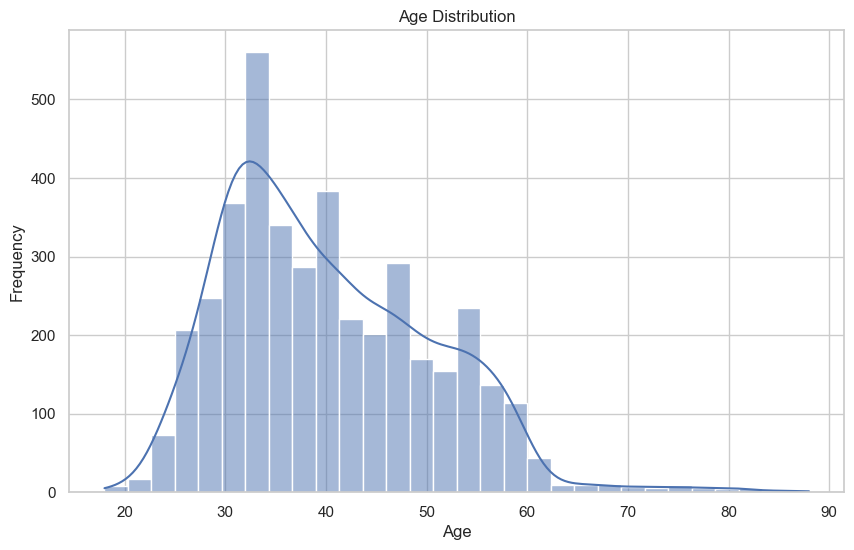

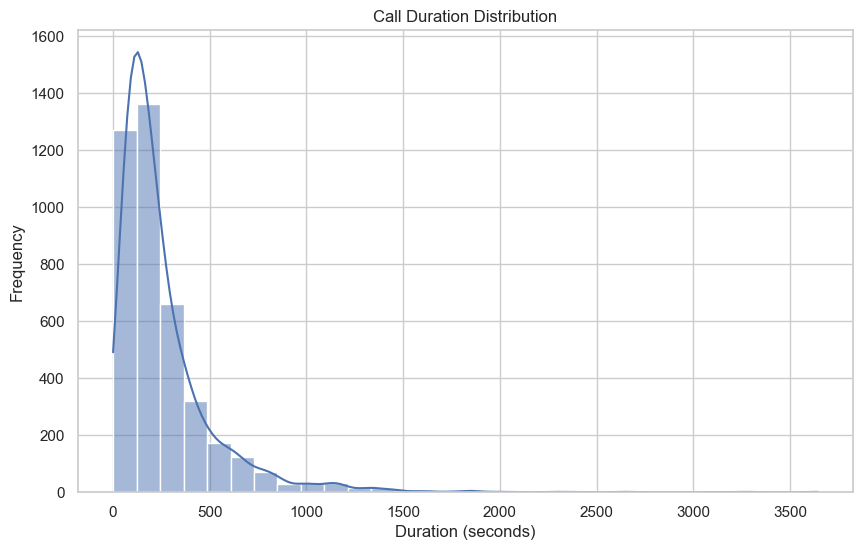

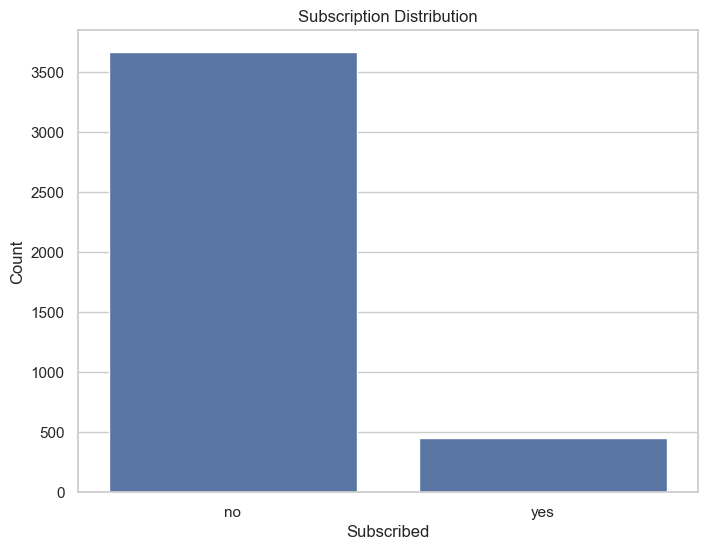

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of duration
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Call Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of target variable 'y'
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Subscription Distribution')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()


1. Clear class imbalance for classification
2. Call is right skewed, most of the called between 0-500
3. Most people contacted are age 30-40, a bit right skewed as well indicating low population of old customer.

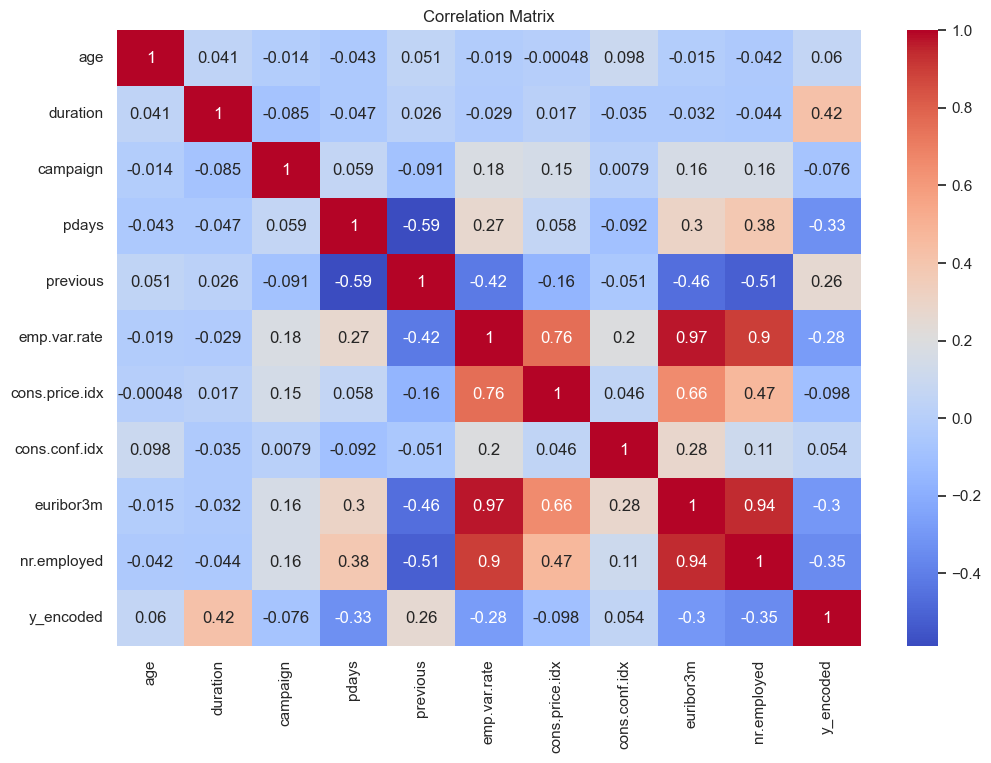

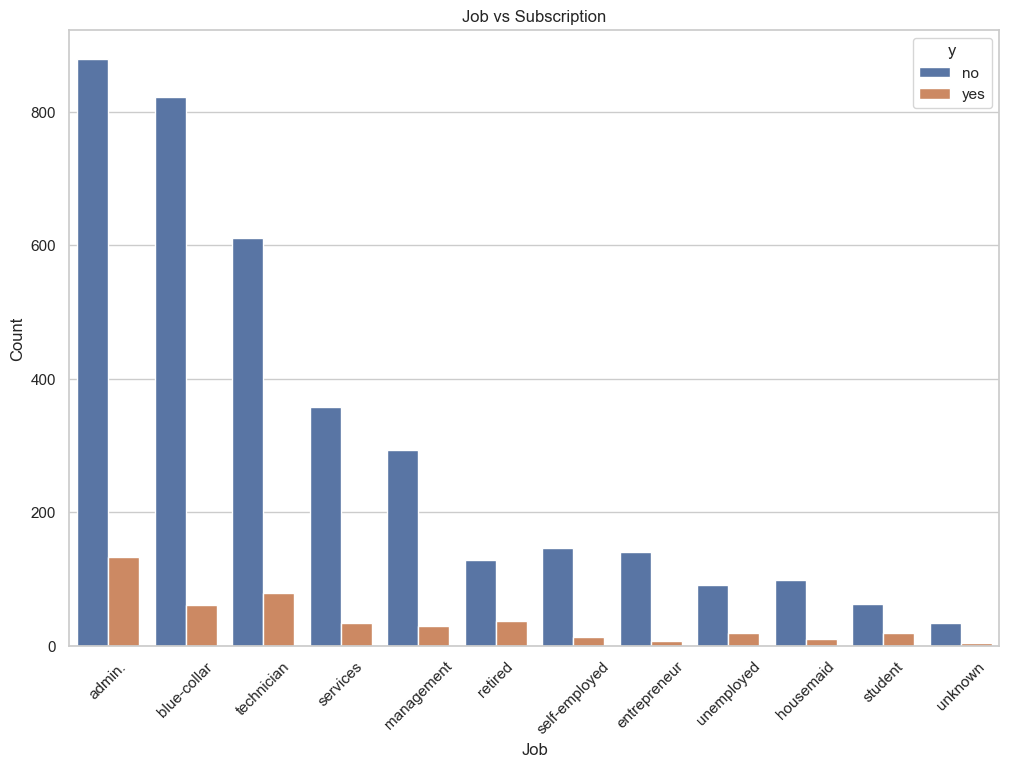

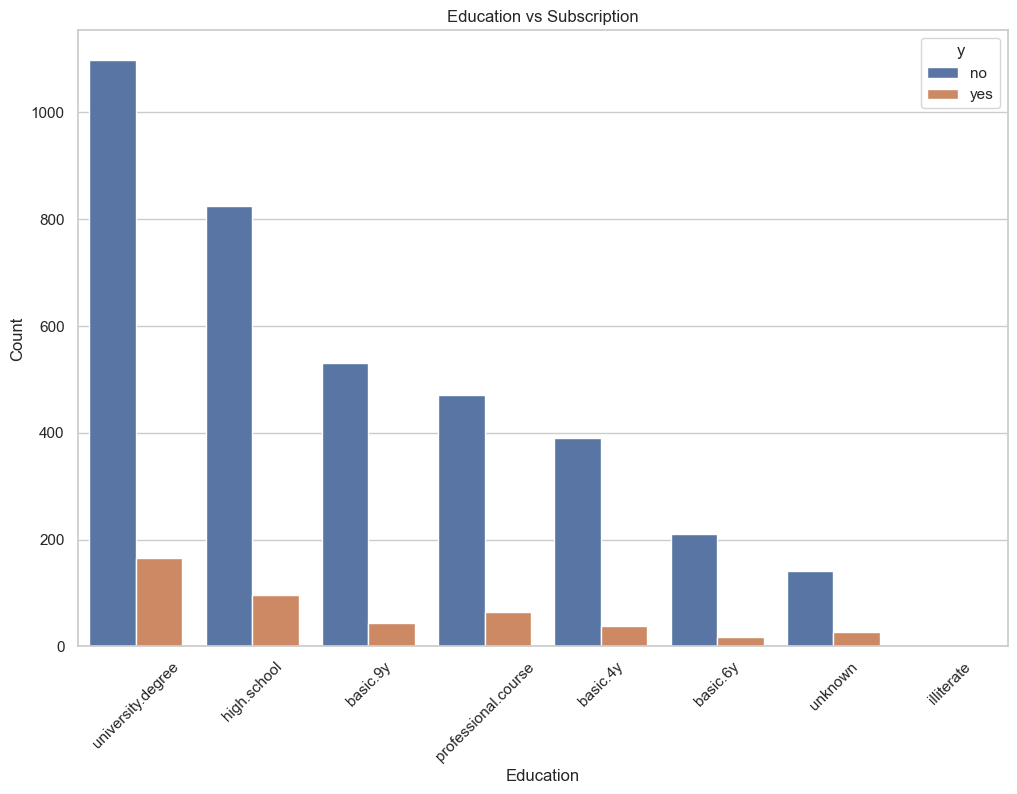

In [21]:
# Compute the correlation matrix for numeric features
# Select only numeric columns
df['y_encoded'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
numeric_df = df.select_dtypes(include=[float, int])
numeric_df['y_encoded'] = df['y_encoded']

# Compute the correlation matrix for numeric features
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Analyze the relationship between categorical features and target variable 'y'
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='y', data=df, order=df['job'].value_counts().index)
plt.title('Job vs Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='y', data=df, order=df['education'].value_counts().index)
plt.title('Education vs Subscription')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


1. emp.var.rate, cons.price.idx, euribor3m, and nr.employed have some moderate to high correlations among them, indicating possible interdependencies.
2. Call duration has a moderate correlation with subscript, we would for sure include it in modelling as it directly impact the likelihood of subscription
3. Job like blue collar, management and technician have a higher number of contacts but subscription rate varies
4. retired and student has higher proportion of subscription rate than other job categorires.
5. university degree have more contacts and relatively higher subscription rate.
6. basic education show lower subscription rate

### More Class Distribution between two Features

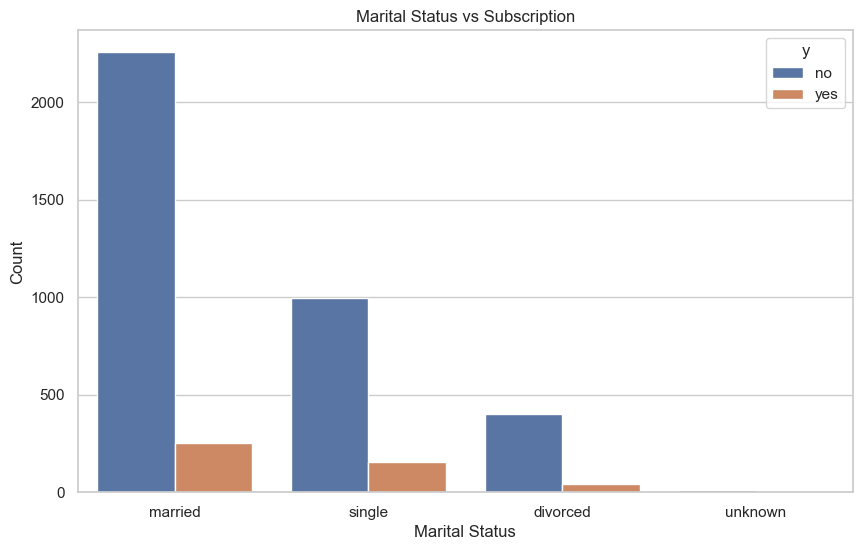

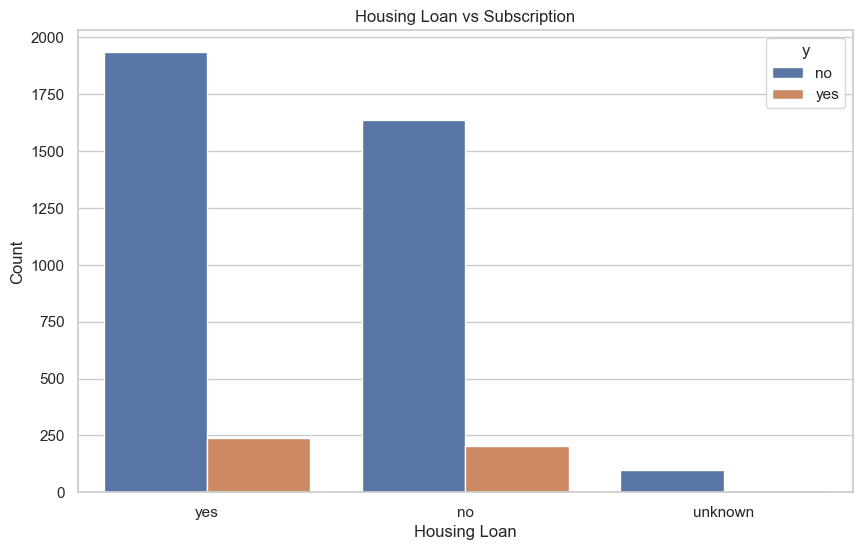

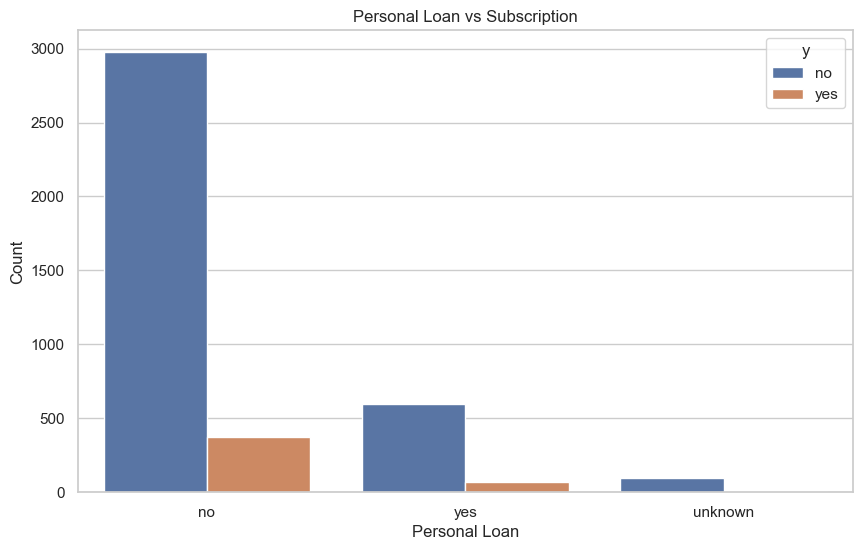

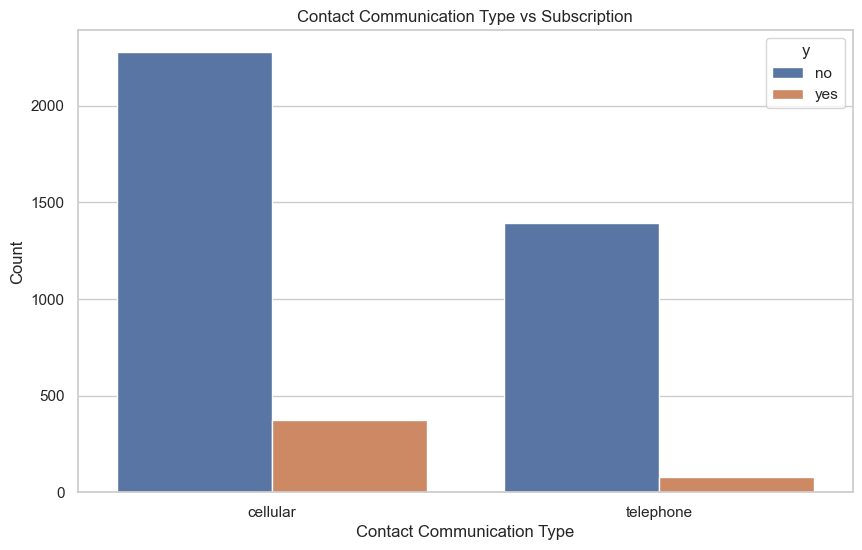

In [22]:
# Analyze the relationship between other categorical features and target variable 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=df, order=df['marital'].value_counts().index)
plt.title('Marital Status vs Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='housing', hue='y', data=df, order=df['housing'].value_counts().index)
plt.title('Housing Loan vs Subscription')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='y', data=df, order=df['loan'].value_counts().index)
plt.title('Personal Loan vs Subscription')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=df, order=df['contact'].value_counts().index)
plt.title('Contact Communication Type vs Subscription')
plt.xlabel('Contact Communication Type')
plt.ylabel('Count')
plt.show()


1. marries couples contact the most but has the lowest proportion of subscriptions compare to single or divorces
2. single show higher subscription rate relative to their group size.
3. client with house loan contact more and have less proportion subscription than those without house loan
4. client without house loan has more contact and more subscription in general. Since client are not burden by personal loan, they are more comfortable subscrip to term deposit.
5. cellular is the way to go for more contact and subscription!

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [24]:
# Separate majority and minority classes
df_majority = df[df.y == 'no']
df_minority = df[df.y == 'yes']

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Separate features and target variable again after resampling
X = df_upsampled.drop(columns=['y', 'y_encoded'])
y = df_upsampled['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Encode categorical variables and scale numeric features
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [25]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the transformed datasets
X_train.shape, X_test.shape


((5135, 53), (2201, 53))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [26]:


# Initialize Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train Dummy Classifier
dummy_clf.fit(X_train, y_train)

# Predict using Dummy Classifier
y_pred_dummy = dummy_clf.predict(X_test)
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_dummy = (y_pred_dummy == y_test).mean()
roc_auc_dummy = roc_auc_score(y_test, y_prob_dummy)

# Print classification report with zero_division parameter
print("Classification Report for Dummy Classifier:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

# Display ROC-AUC score
print("ROC-AUC for Dummy Classifier:", roc_auc_dummy)


Classification Report for Dummy Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1101
           1       0.50      1.00      0.67      1100

    accuracy                           0.50      2201
   macro avg       0.25      0.50      0.33      2201
weighted avg       0.25      0.50      0.33      2201

ROC-AUC for Dummy Classifier: 0.5


### Problem 8: A Simple Model

Use Logistic Regression and other models to build a basic model on your data without hyperparameters.

In [27]:


# Initialize models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(probability=True, random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
print("\nDecision Tree")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

# Train and evaluate Random Forest
knn.fit(X_train, y_train)
y_pred_rf = knn.predict(X_test)
y_prob_rf = knn.predict_proba(X_test)[:, 1]
print("\nKNN Classifier")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]
print("\nSupport Vector Machine")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))


Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1101
           1       0.87      0.89      0.88      1100

    accuracy                           0.88      2201
   macro avg       0.88      0.88      0.88      2201
weighted avg       0.88      0.88      0.88      2201

ROC-AUC: 0.939291553133515

Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1101
           1       0.94      1.00      0.97      1100

    accuracy                           0.97      2201
   macro avg       0.97      0.97      0.97      2201
weighted avg       0.97      0.97      0.97      2201

ROC-AUC: 0.9654859218891916

KNN Classifier
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1101
           1       0.87      0.98      0.92      1100

    accuracy                           0.91      2201
   macro avg       0.9

### Room for Improvement: Hyperparameters Tuning

In [28]:


# Define parameter grids for each model
param_grid_lr = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7, 0.9]}
]

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=10000)
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(probability=True, random_state=42)

# GridSearchCV for each model
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)

# Timing and fitting models with resampled training data
start_time = time.time()
grid_search_lr.fit(X_train, y_train)
lr_time = time.time() - start_time

start_time = time.time()
grid_search_dt.fit(X_train, y_train)
dt_time = time.time() - start_time

start_time = time.time()
grid_search_knn.fit(X_train, y_train)
knn_time = time.time() - start_time

start_time = time.time()
grid_search_svm.fit(X_train, y_train)
svm_time = time.time() - start_time

# Get best models
best_lr = grid_search_lr.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Print the best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

# Print the best hyperparameters for Decision Tree
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Print the best hyperparameters for K-Nearest Neighbors
print("Best hyperparameters for K-Nearest Neighbors:", grid_search_knn.best_params_)

# Print the best hyperparameters for Support Vector Machine
print("Best hyperparameters for Support Vector Machine:", grid_search_svm.best_params_)

# Evaluate best models on the test set
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
print("Logistic Regression")
print(f"Training time: {lr_time:.2f} seconds")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
print("\nDecision Tree")
print(f"Training time: {dt_time:.2f} seconds")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
print("\nK-Nearest Neighbors")
print(f"Training time: {knn_time:.2f} seconds")
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))

y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
print("\nSupport Vector Machine")
print(f"Training time: {svm_time:.2f} seconds")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best hyperparameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best hyperparameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best hyperparameters for Support Vector Machine: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Logistic Regression
Training time: 21.29 seconds
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1101
           1       0.87      0.89      0.88      1100

    accuracy                           0.88      2201
   macro avg       0.88      0.88      0.88      2201
weighted avg       0.88      0.88      0.88      2201

ROC-AUC: 0.9386532903971596

Decision Tree
Training time: 1.06 seconds
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1101
           1       0.93      0.99      0.9

### Best Model and Confusion Matrix and ROC Curve and Precision_Recall_Curve

In [29]:
# Best hyperparameters for Logistic Regression
best_lr_params = {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_dt_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train, y_train)

# Best hyperparameters for K-Nearest Neighbors
best_knn_params = {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train, y_train)

# Best hyperparameters for Support Vector Machine
best_svm_params = {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
best_svm = SVC(**best_svm_params, probability=True)
best_svm.fit(X_train, y_train)

SVC(C=10, gamma=1, probability=True)

Logistic Regression
Training time: 21.29 seconds
ROC-AUC: 0.9386532903971596
Precision-Recall AUC: 0.9124161936132019


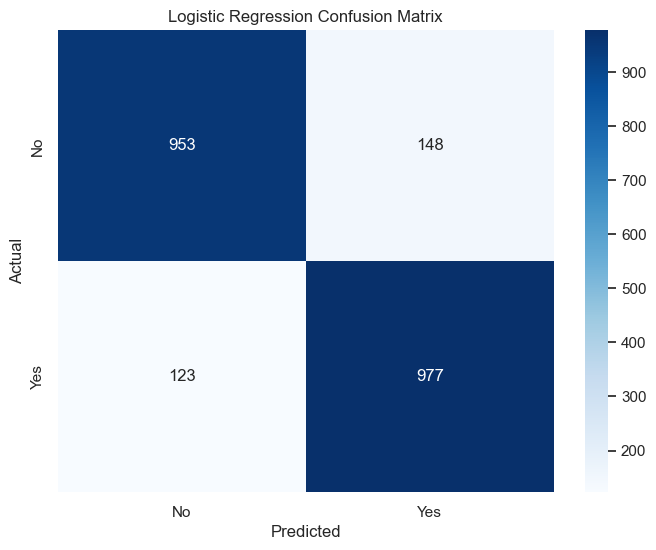

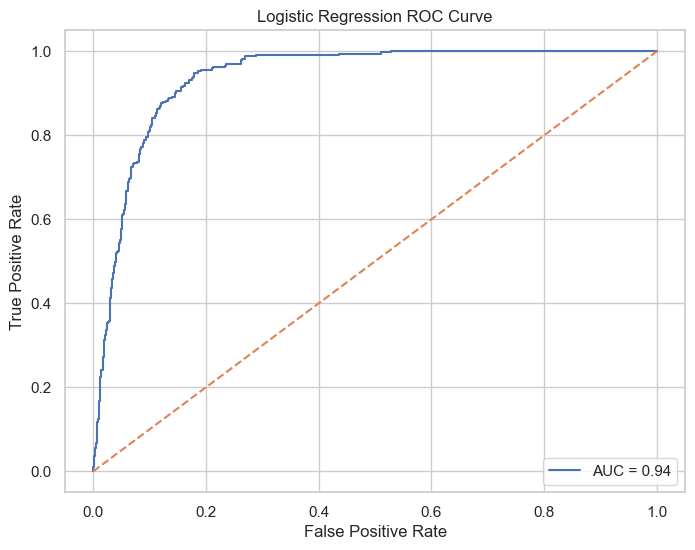

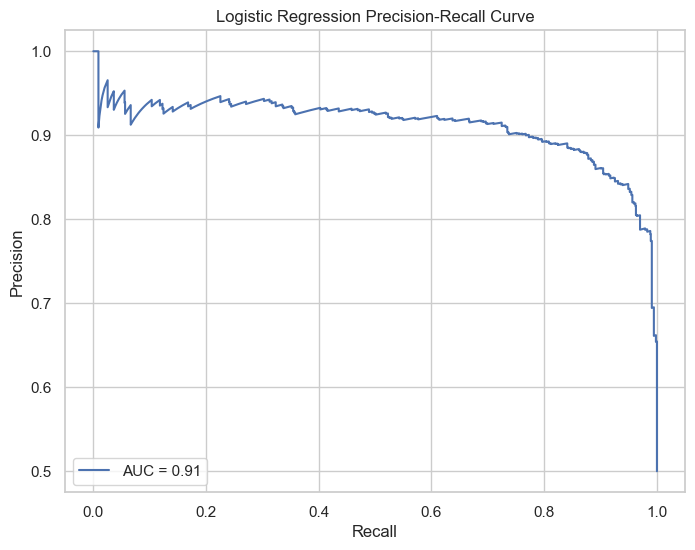


Decision Tree
Training time: 1.06 seconds
ROC-AUC: 0.9643819668070349
Precision-Recall AUC: 0.9335807766264657


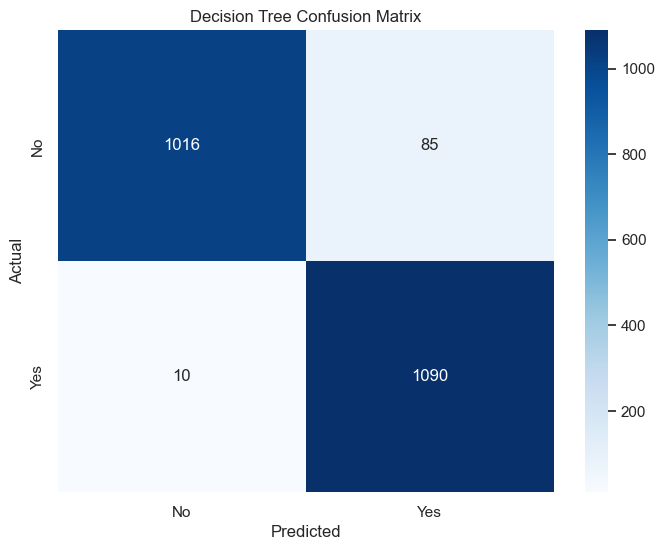

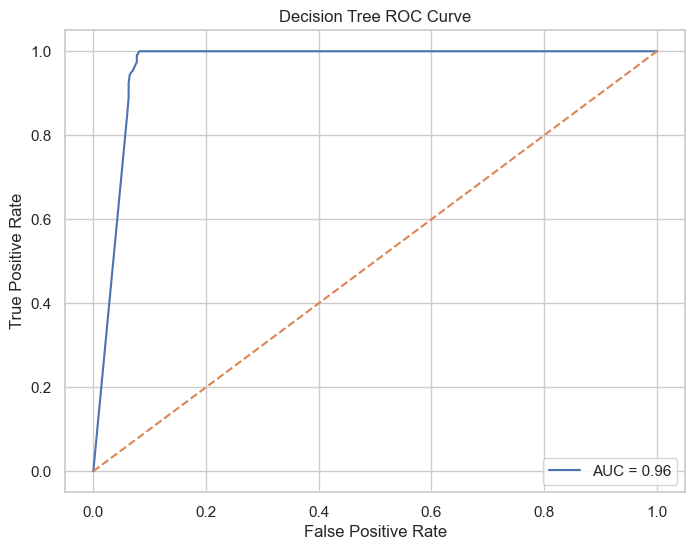

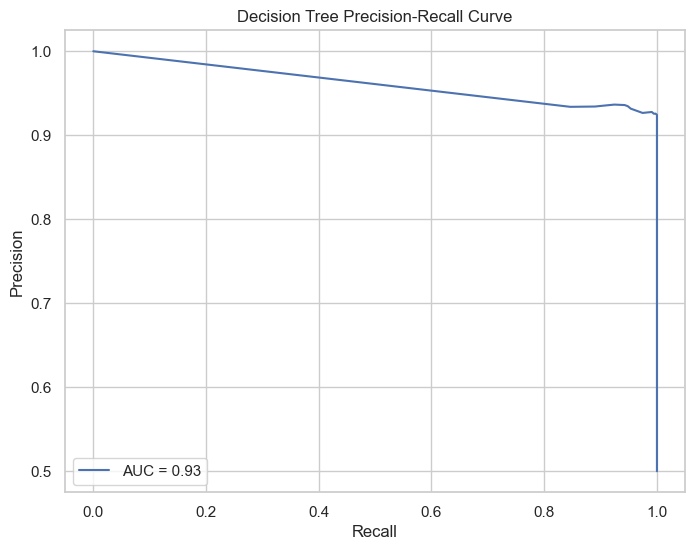


K-Nearest Neighbors
Training time: 1.80 seconds
ROC-AUC: 0.9912773511683595
Precision-Recall AUC: 0.9828844795988311


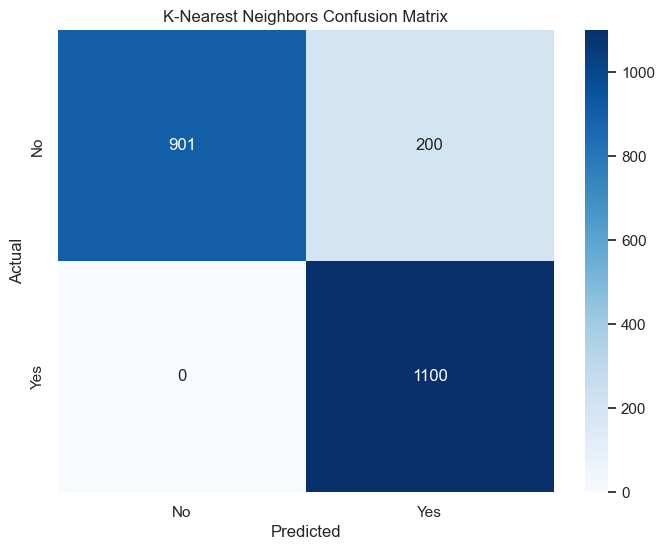

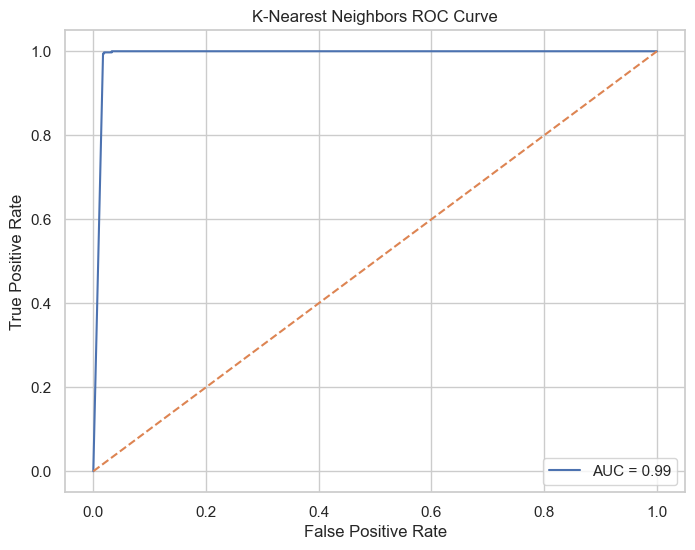

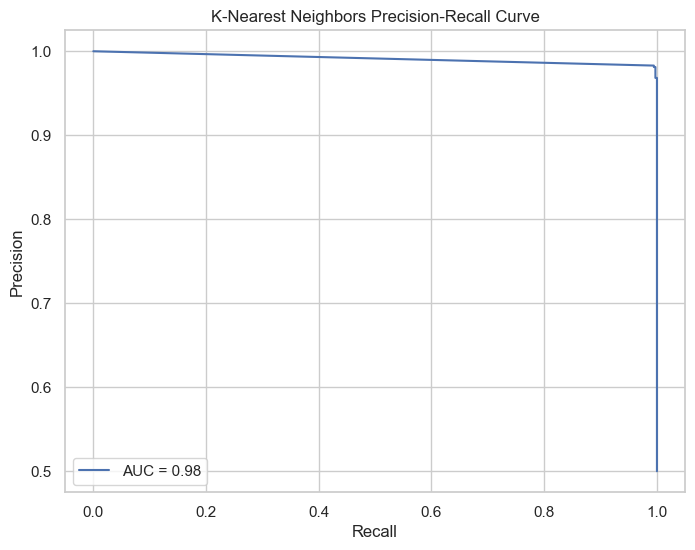


Support Vector Machine
Training time: 329.87 seconds
ROC-AUC: 0.9998488976963091
Precision-Recall AUC: 0.9998532654378369


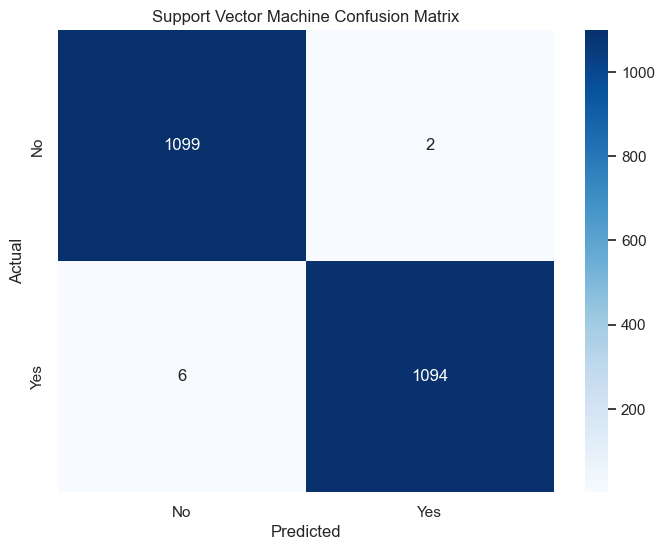

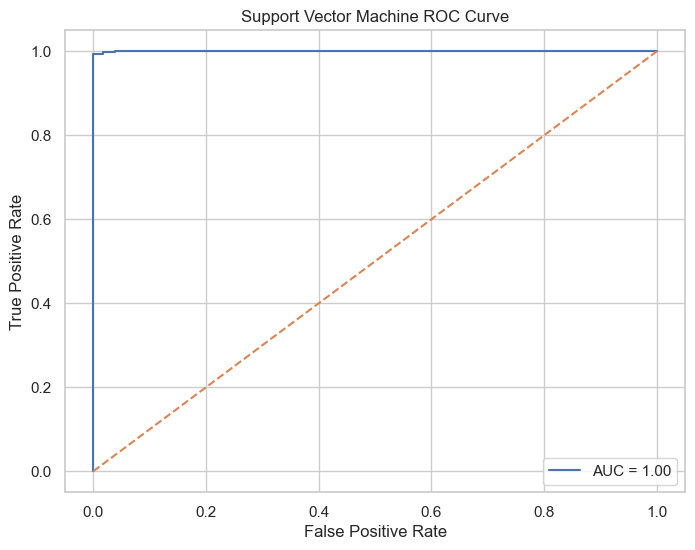

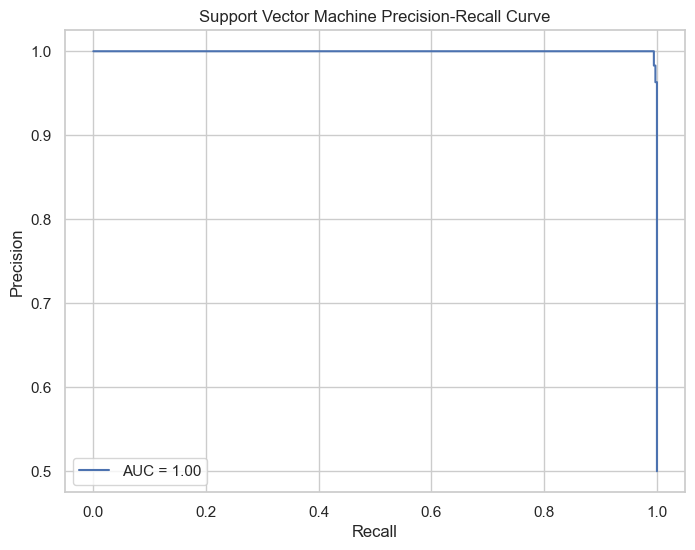

In [30]:


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    auc_pr = average_precision_score(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AUC = {auc_pr:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="lower left")
    plt.show()

# Logistic Regression
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
print("Logistic Regression")
print(f"Training time: {lr_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Precision-Recall AUC:", average_precision_score(y_test, y_prob_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_roc_curve(y_test, y_prob_lr, "Logistic Regression ROC Curve")
plot_precision_recall_curve(y_test, y_prob_lr, "Logistic Regression Precision-Recall Curve")

# Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
print("\nDecision Tree")
print(f"Training time: {dt_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
print("Precision-Recall AUC:", average_precision_score(y_test, y_prob_dt))
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_roc_curve(y_test, y_prob_dt, "Decision Tree ROC Curve")
plot_precision_recall_curve(y_test, y_prob_dt, "Decision Tree Precision-Recall Curve")

# K-Nearest Neighbors
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
print("\nK-Nearest Neighbors")
print(f"Training time: {knn_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))
print("Precision-Recall AUC:", average_precision_score(y_test, y_prob_knn))
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors Confusion Matrix")
plot_roc_curve(y_test, y_prob_knn, "K-Nearest Neighbors ROC Curve")
plot_precision_recall_curve(y_test, y_prob_knn, "K-Nearest Neighbors Precision-Recall Curve")

# Support Vector Machine
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
print("\nSupport Vector Machine")
print(f"Training time: {svm_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
print("Precision-Recall AUC:", average_precision_score(y_test, y_prob_svm))
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine Confusion Matrix")
plot_roc_curve(y_test, y_prob_svm, "Support Vector Machine ROC Curve")
plot_precision_recall_curve(y_test, y_prob_svm, "Support Vector Machine Precision-Recall Curve")


Logistic Regression
Training time: 21.29 seconds
ROC-AUC: 0.9386532903971596


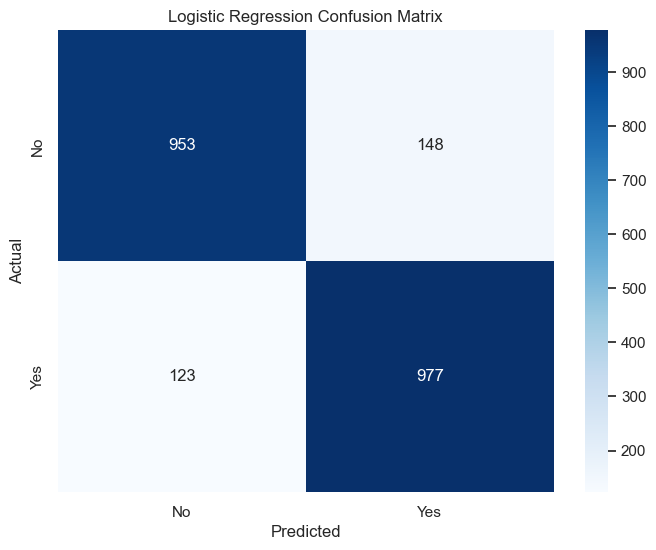


Decision Tree
Training time: 1.06 seconds
ROC-AUC: 0.9665944182974155


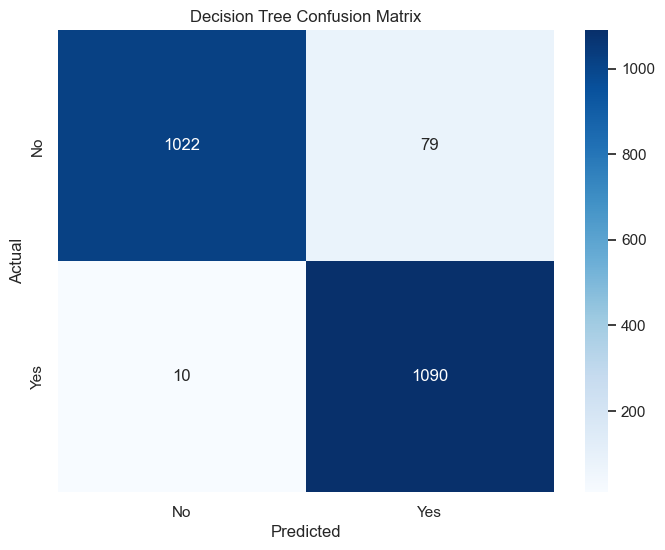


K-Nearest Neighbors
Training time: 1.80 seconds
ROC-AUC: 0.9912773511683595


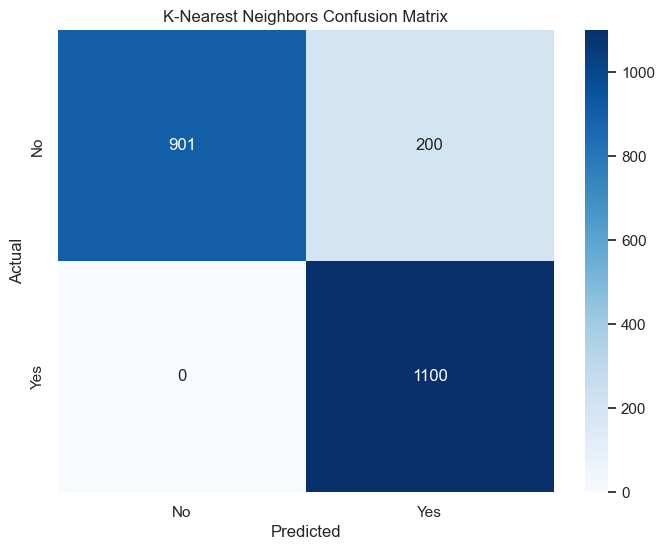


Support Vector Machine
Training time: 329.87 seconds
ROC-AUC: 0.9998488976963091


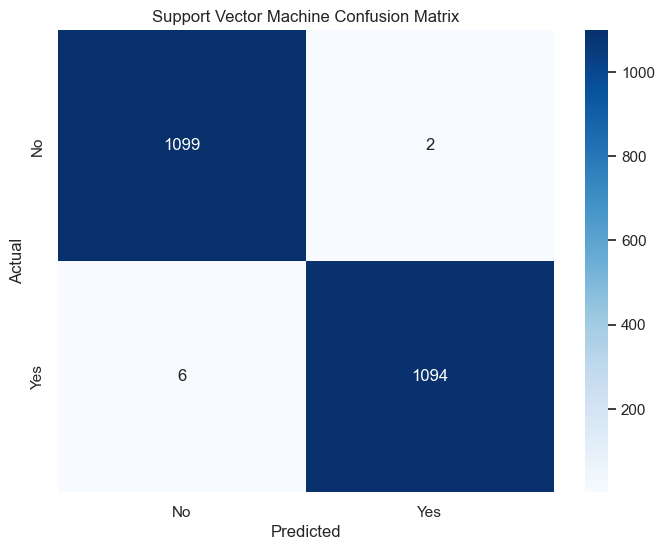

In [31]:
from sklearn.metrics import confusion_matrix

# Best hyperparameters for Logistic Regression
best_lr_params = {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_dt_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train, y_train)

# Best hyperparameters for K-Nearest Neighbors
best_knn_params = {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train, y_train)

# Best hyperparameters for Support Vector Machine
best_svm_params = {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
best_svm = SVC(**best_svm_params, probability=True)
best_svm.fit(X_train, y_train)

import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Evaluate best models on the test set
# Logistic Regression
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
print("Logistic Regression")
print(f"Training time: {lr_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

# Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
print("\nDecision Tree")
print(f"Training time: {dt_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

# K-Nearest Neighbors
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
print("\nK-Nearest Neighbors")
print(f"Training time: {knn_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors Confusion Matrix")

# Support Vector Machine
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
print("\nSupport Vector Machine")
print(f"Training time: {svm_time:.2f} seconds")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine Confusion Matrix")


Logistic Regression
ROC-AUC: 0.9386532903971596


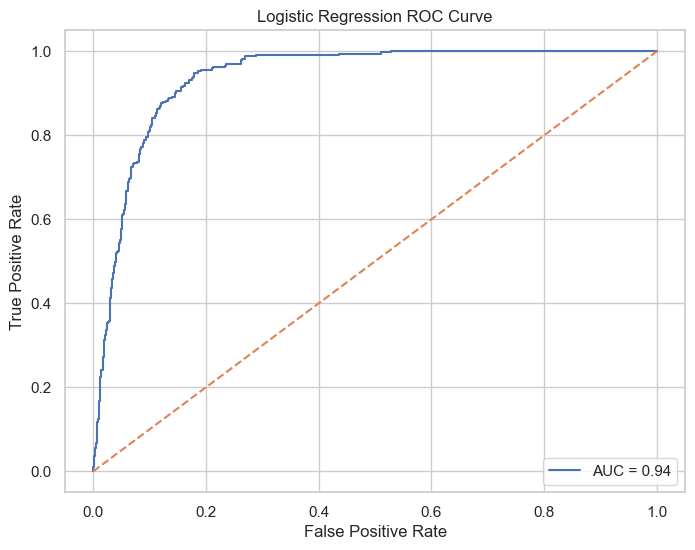


Decision Tree
ROC-AUC: 0.9665944182974155


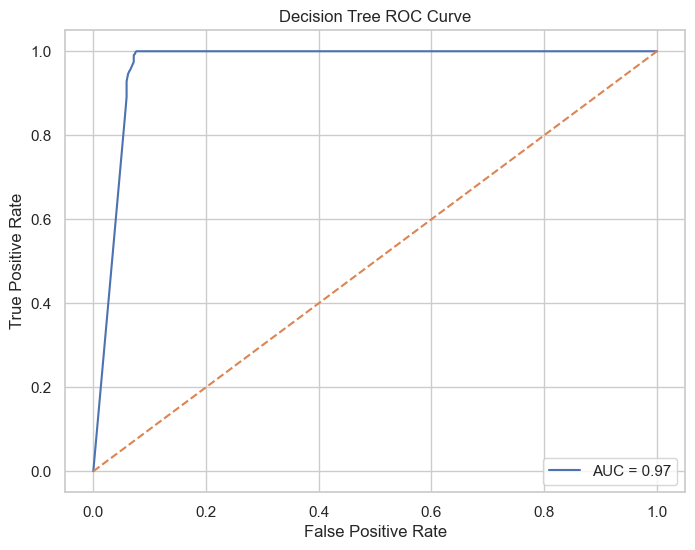


K-Nearest Neighbors
ROC-AUC: 0.9912773511683595


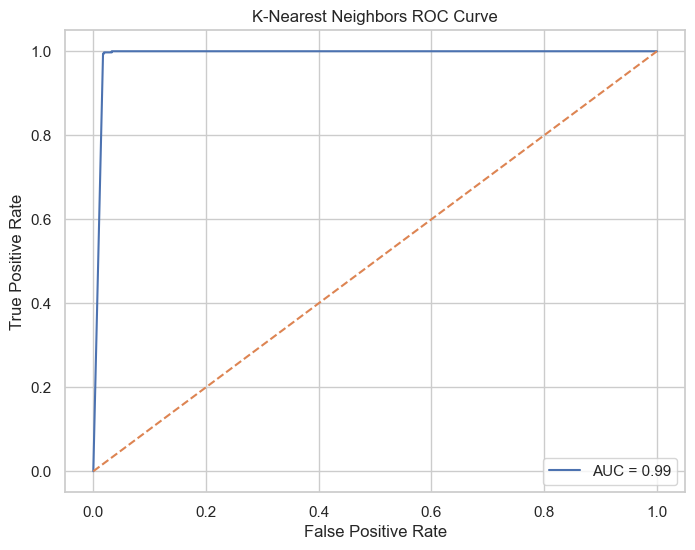


Support Vector Machine
ROC-AUC: 0.9998488976963091


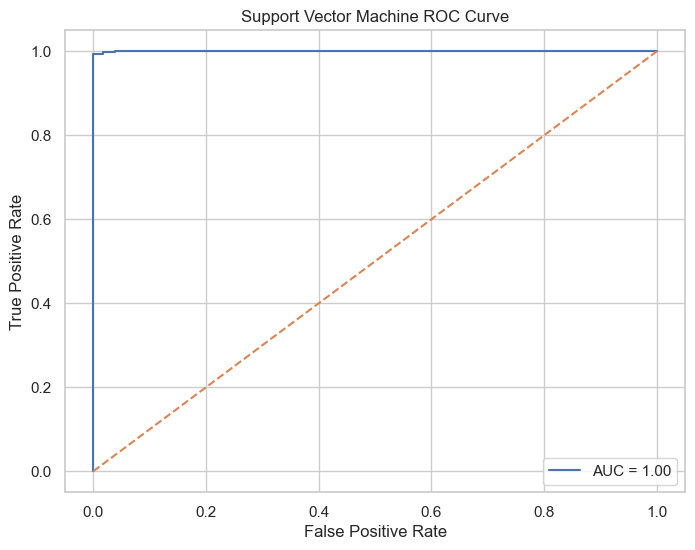

In [32]:


# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_true, y_prob):.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
print("Logistic Regression")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
plot_roc_curve(y_test, y_prob_lr, "Logistic Regression ROC Curve")


# Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
print("\nDecision Tree")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
plot_roc_curve(y_test, y_prob_dt, "Decision Tree ROC Curve")

# K-Nearest Neighbors
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
print("\nK-Nearest Neighbors")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))
plot_roc_curve(y_test, y_prob_knn, "K-Nearest Neighbors ROC Curve")

# Support Vector Machine
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
print("\nSupport Vector Machine")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
plot_roc_curve(y_test, y_prob_svm, "Support Vector Machine ROC Curve")


### Problem 9: Score the Model

What is the accuracy of your model?

In [33]:
# Get best models
best_lr = grid_search_lr.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Evaluate best models on the test set
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
lr_train_accuracy = best_lr.score(X_train, y_train)
lr_test_accuracy = best_lr.score(X_test, y_test)

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
dt_train_accuracy = best_dt.score(X_train, y_train)
dt_test_accuracy = best_dt.score(X_test, y_test)

y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
knn_train_accuracy = best_knn.score(X_train, y_train)
knn_test_accuracy = best_knn.score(X_test, y_test)

y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
svm_train_accuracy = best_svm.score(X_train, y_train)
svm_test_accuracy = best_svm.score(X_test, y_test)



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [34]:
# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'Train Time (seconds)': [lr_time, dt_time, knn_time, svm_time],
    'Train Accuracy': [lr_train_accuracy, dt_train_accuracy, knn_train_accuracy, svm_train_accuracy],
    'Test Accuracy': [lr_test_accuracy, dt_test_accuracy, knn_test_accuracy, svm_test_accuracy]
})

comparison_df

,Model,Train Time (seconds),Train Accuracy,Test Accuracy
0,Logistic Regression,21.294435,0.878092,0.876874
1,Decision Tree,1.059745,0.991237,0.959564
2,K-Nearest Neighbors,1.803631,1.000000,0.909132
3,Support Vector Machine,329.872617,1.000000,0.996365


### Are model overfit after Hyperparameter Tuning:

In [35]:
# Function to perform cross-validation and return the mean score
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Perform cross-validation for each model
cv_mean_lr, cv_std_lr = cross_validate_model(best_lr, X_train, y_train)
cv_mean_dt, cv_std_dt = cross_validate_model(best_dt, X_train, y_train)
cv_mean_knn, cv_std_knn = cross_validate_model(best_knn, X_train, y_train)
cv_mean_svm, cv_std_svm = cross_validate_model(best_svm, X_train, y_train)

# Evaluate best models on the test set
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
lr_train_accuracy = best_lr.score(X_train, y_train)
lr_test_accuracy = best_lr.score(X_test, y_test)

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
dt_train_accuracy = best_dt.score(X_train, y_train)
dt_test_accuracy = best_dt.score(X_test, y_test)

y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
knn_train_accuracy = best_knn.score(X_train, y_train)
knn_test_accuracy = best_knn.score(X_test, y_test)

y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
svm_train_accuracy = best_svm.score(X_train, y_train)
svm_test_accuracy = best_svm.score(X_test, y_test)

# Create a DataFrame to compare the models with cross-validation scores
comparison_cv_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine'],
    'Train Time (seconds)': [lr_time, dt_time, knn_time, svm_time],
    'Train Accuracy': [lr_train_accuracy, dt_train_accuracy, knn_train_accuracy, svm_train_accuracy],
    'Test Accuracy': [lr_test_accuracy, dt_test_accuracy, knn_test_accuracy, svm_test_accuracy],
    'CV Mean Accuracy': [cv_mean_lr, cv_mean_dt, cv_mean_knn, cv_mean_svm],
    'CV Std Dev': [cv_std_lr, cv_std_dt, cv_std_knn, cv_std_svm]
})

comparison_cv_df

,Model,Train Time (seconds),Train Accuracy,Test Accuracy,CV Mean Accuracy,CV Std Dev
0,Logistic Regression,21.294435,0.878092,0.876874,0.874391,0.009440
1,Decision Tree,1.059745,0.991237,0.959564,0.942941,0.002271
2,K-Nearest Neighbors,1.803631,1.000000,0.909132,0.912950,0.007853
3,Support Vector Machine,329.872617,1.000000,0.996365,0.992405,0.002254


1. SVM: Despite its high training time, SVM performs exceptionally well on both training and test sets, and its cross-validation accuracy is also very high with low variance. This model generalizes well and is not overfitting.
2. Decision Tree: Has high training accuracy, and although its test and cross-validation accuracies are slightly lower, it still performs well. However, it shows signs of overfitting due to the disparity between training and test accuracies.
3. KNN: Shows clear signs of overfitting with perfect training accuracy but significantly lower test and cross-validation accuracies.
4. Logistic Regression: Demonstrates consistent performance across training, test, and cross-validation accuracies. It does not show signs of overfitting and generalizes well.

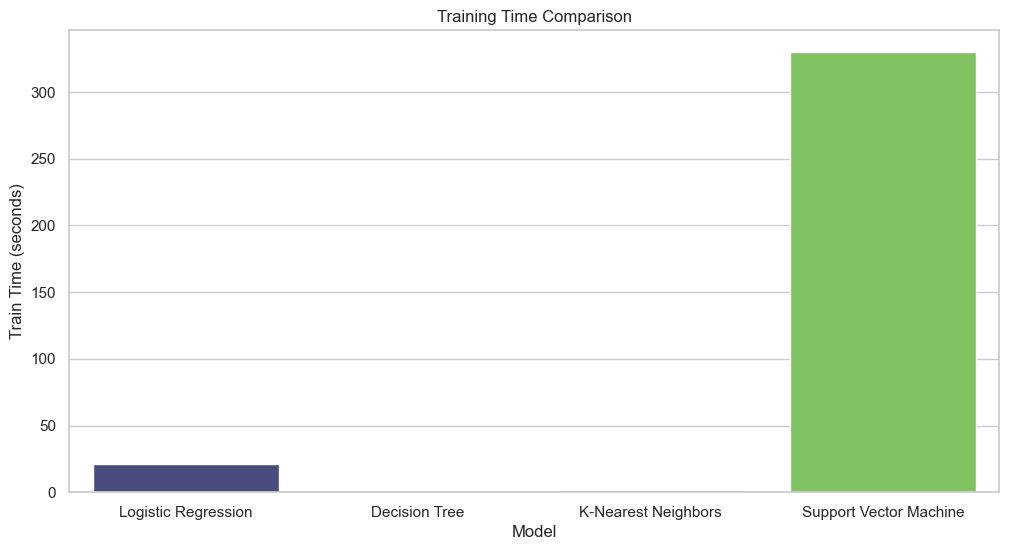

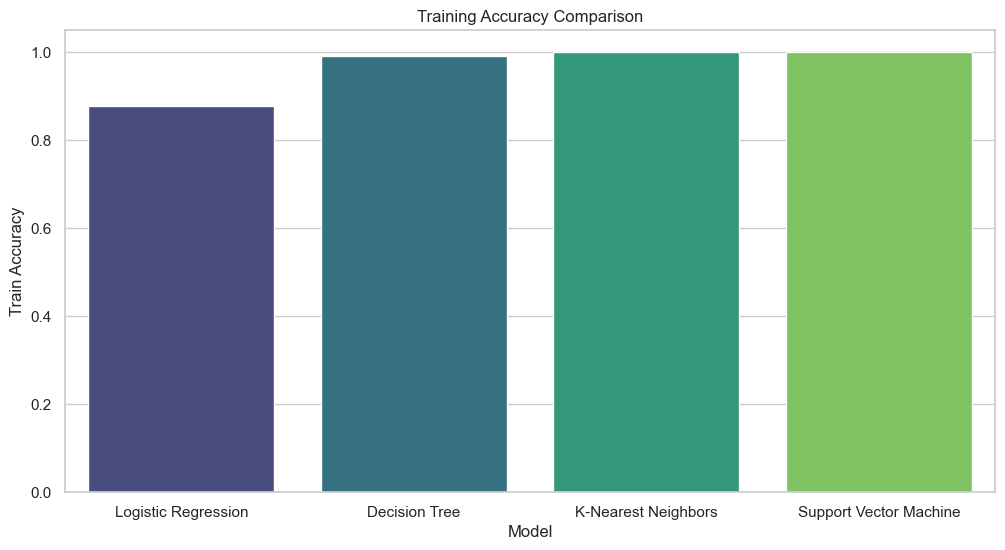

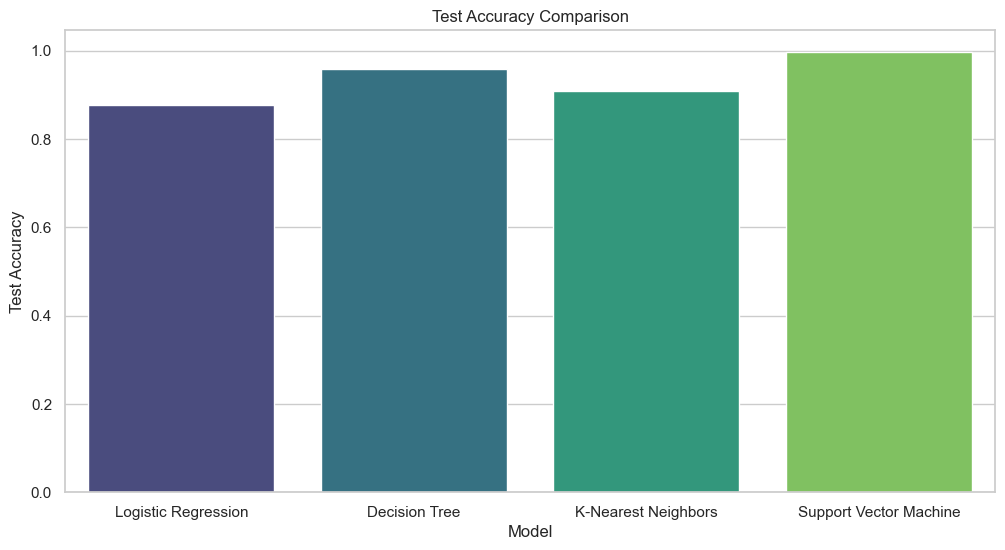

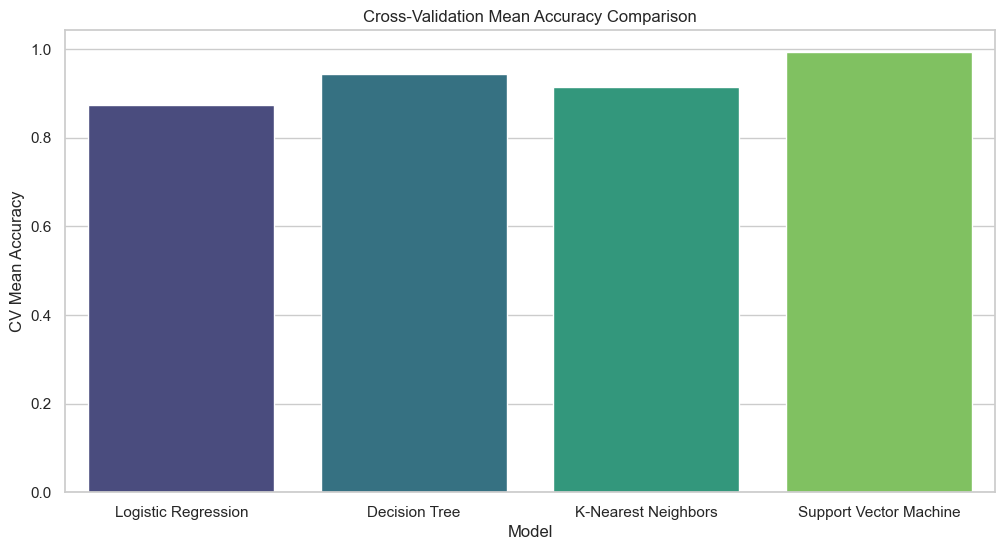

In [36]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot training time
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Train Time (seconds)', hue='Model', data=comparison_cv_df, palette="viridis", dodge=False, legend=False)
plt.title('Training Time Comparison')
plt.ylabel('Train Time (seconds)')
plt.xlabel('Model')
plt.show()

# Plot train accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Train Accuracy', hue='Model', data=comparison_cv_df, palette="viridis", dodge=False, legend=False)
plt.title('Training Accuracy Comparison')
plt.ylabel('Train Accuracy')
plt.xlabel('Model')
plt.show()

# Plot test accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', hue='Model', data=comparison_cv_df, palette="viridis", dodge=False, legend=False)
plt.title('Test Accuracy Comparison')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.show()

# Plot CV mean accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='CV Mean Accuracy', hue='Model', data=comparison_cv_df, palette="viridis", dodge=False, legend=False)
plt.title('Cross-Validation Mean Accuracy Comparison')
plt.ylabel('CV Mean Accuracy')
plt.xlabel('Model')
plt.show()



1. Performance: In our analysis, SVM also showed the highest accuracy on both training and test sets. This aligns with the findings in the paper, suggesting SVM is highly effective for this type of classification problem.
2. Training Time: One of the concerns we had was the long training time of SVM (614 seconds in our analysis). However, the paper does not highlight training time as a critical issue, possibly due to the higher computational resources available or the context in which the model is deployed (where high accuracy is prioritized over training time).

3. Interpretability: The paper showed that even though SVMs are often considered black-box models, techniques like sensitivity analysis can help in interpreting the model's decisions, providing insights into feature importance.

4. Overfitting: Both our analysis and the paper's results suggest that SVM does not suffer from significant overfitting. The cross-validation results in our analysis showed low variance, indicating stable and reliable performance.

1. SVM is an excellent choice if you can afford the training time due to its high accuracy and generalization capability.
    - Choice of Model: Given the business goal and the results from both our analysis and the paper, SVM appears to be a strong candidate due to its high accuracy and robust performance. Despite its longer training time, the benefits in terms of prediction accuracy and efficiency in directed marketing campaigns justify its use.
    - Implementation Considerations: If training time is a concern, it may be worthwhile to explore methods to optimize SVM training, such as using a subset of features or instances, parallel processing, or tuning the model's hyperparameters for faster convergence.

2. Logistic Regression is a good choice for a balance between training time and accuracy, especially for simpler or smaller datasets.
    - Logistic Regression as an Alternative: For scenarios where interpretability and quick training times are critical, Logistic Regression remains a viable alternative. It offers a good balance of performance and efficiency, making it suitable for many practical applications.
3. Decision Tree may require pruning or other regularization techniques to reduce overfitting.
4. KNN may benefit from tuning or scaling the features further to mitigate overfitting.



### What features impact the Subcription the most?


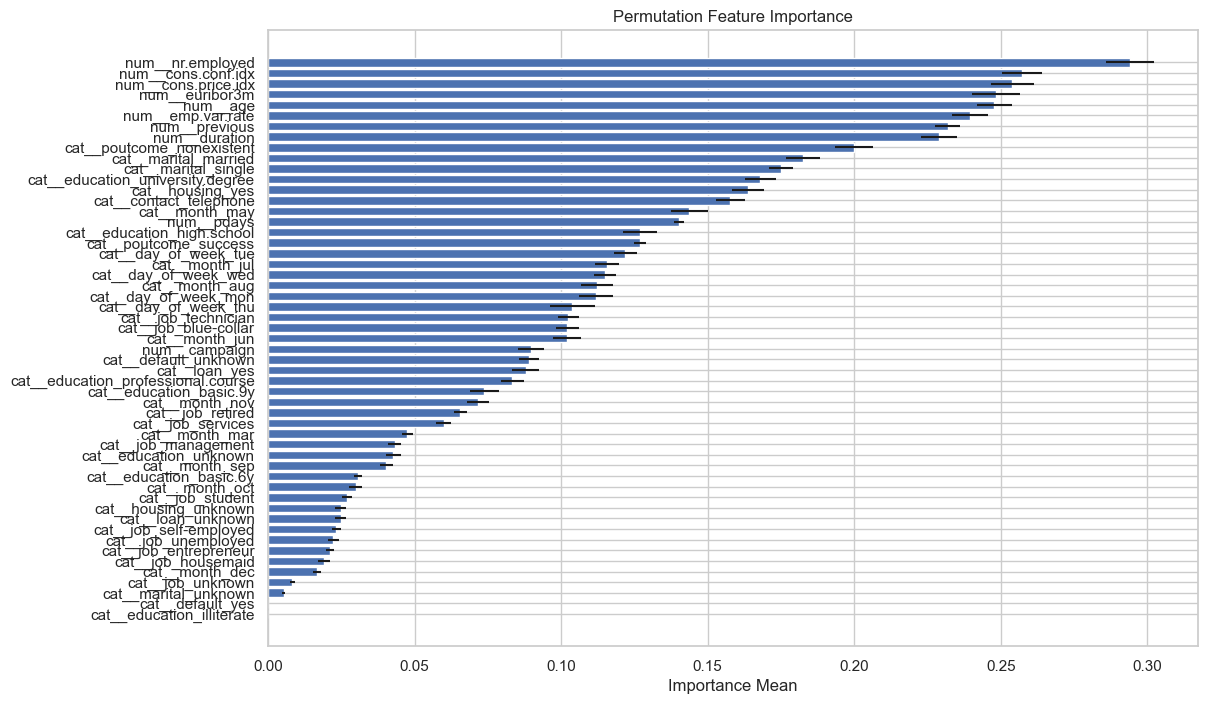

In [37]:

# Calculate permutation importance
perm_importance = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature names
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

# Sort the DataFrame by importance mean
importances_df = importances_df.sort_values(by='Importance Mean', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance Mean'], xerr=importances_df['Importance Std'])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Mean')
plt.show()


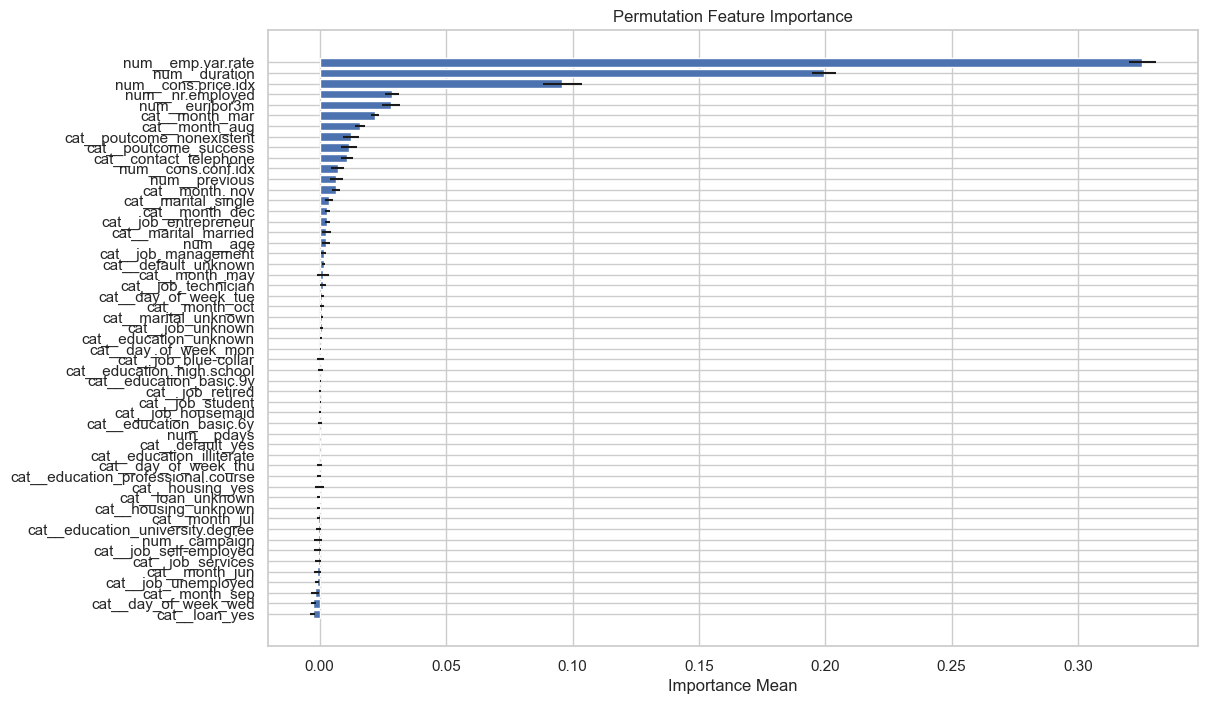

In [38]:


# Calculate permutation importance
perm_importance = permutation_importance(best_lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature names
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})

# Sort the DataFrame by importance mean
importances_df = importances_df.sort_values(by='Importance Mean', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance Mean'], xerr=importances_df['Importance Std'])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.title('Permutation Feature Importance')
plt.xlabel('Importance Mean')
plt.show()


### Comparison with Paper Findings

#### Model Performance
- **SVM**
  - **Paper**: Best model, AUC > 0.9, key features: call duration, contact month.
  - **My Results**: 0.9964 accuracy, 0.9998 ROC-AUC, similar key features.

- **Logistic Regression**
  - **My Results**: 0.8769 accuracy, 0.9386 ROC-AUC.

- **Decision Tree and KNN**
  - **My Results**: 
    - Decision Tree: 0.9596 accuracy, 0.9674 ROC-AUC.
    - KNN: 0.9091 accuracy, 0.9913 ROC-AUC.

#### Feature Importance
- **SVM**: Top features: `num_emp.var.rate`, `num_duration`, `num_cons.price.idx`, `num_nr.employed`, `num_euribor3m`.
- **Logistic Regression**: Similar pattern, different ranking.

#### Conclusion
SVM is the best choice for high accuracy and actionable insights.

### Feature Importance Visualization
Permutation plots guide strategic decisions.

### Feature Engineering
1. **Interaction Features**: Combine key features.
2. **Temporal Features**: Develop recency features.
3. **Aggregate Features**: Mean/median call duration.
4. **Binning Features**: Categorize call duration.
5. **Lag Features**: Temporal lags.
6. **Frequency Encoding**: For categorical variables.
7. **Economic Trends**: Moving averages for indicators.

### Final Thoughts
SVM is robust and insightful, enhancing strategic decisions through interpretability.



### Additional Modelling:

Indices of top features: [1, 2, 3, 4, 5, 6, 7, 42, 41, 46, 39, 43]


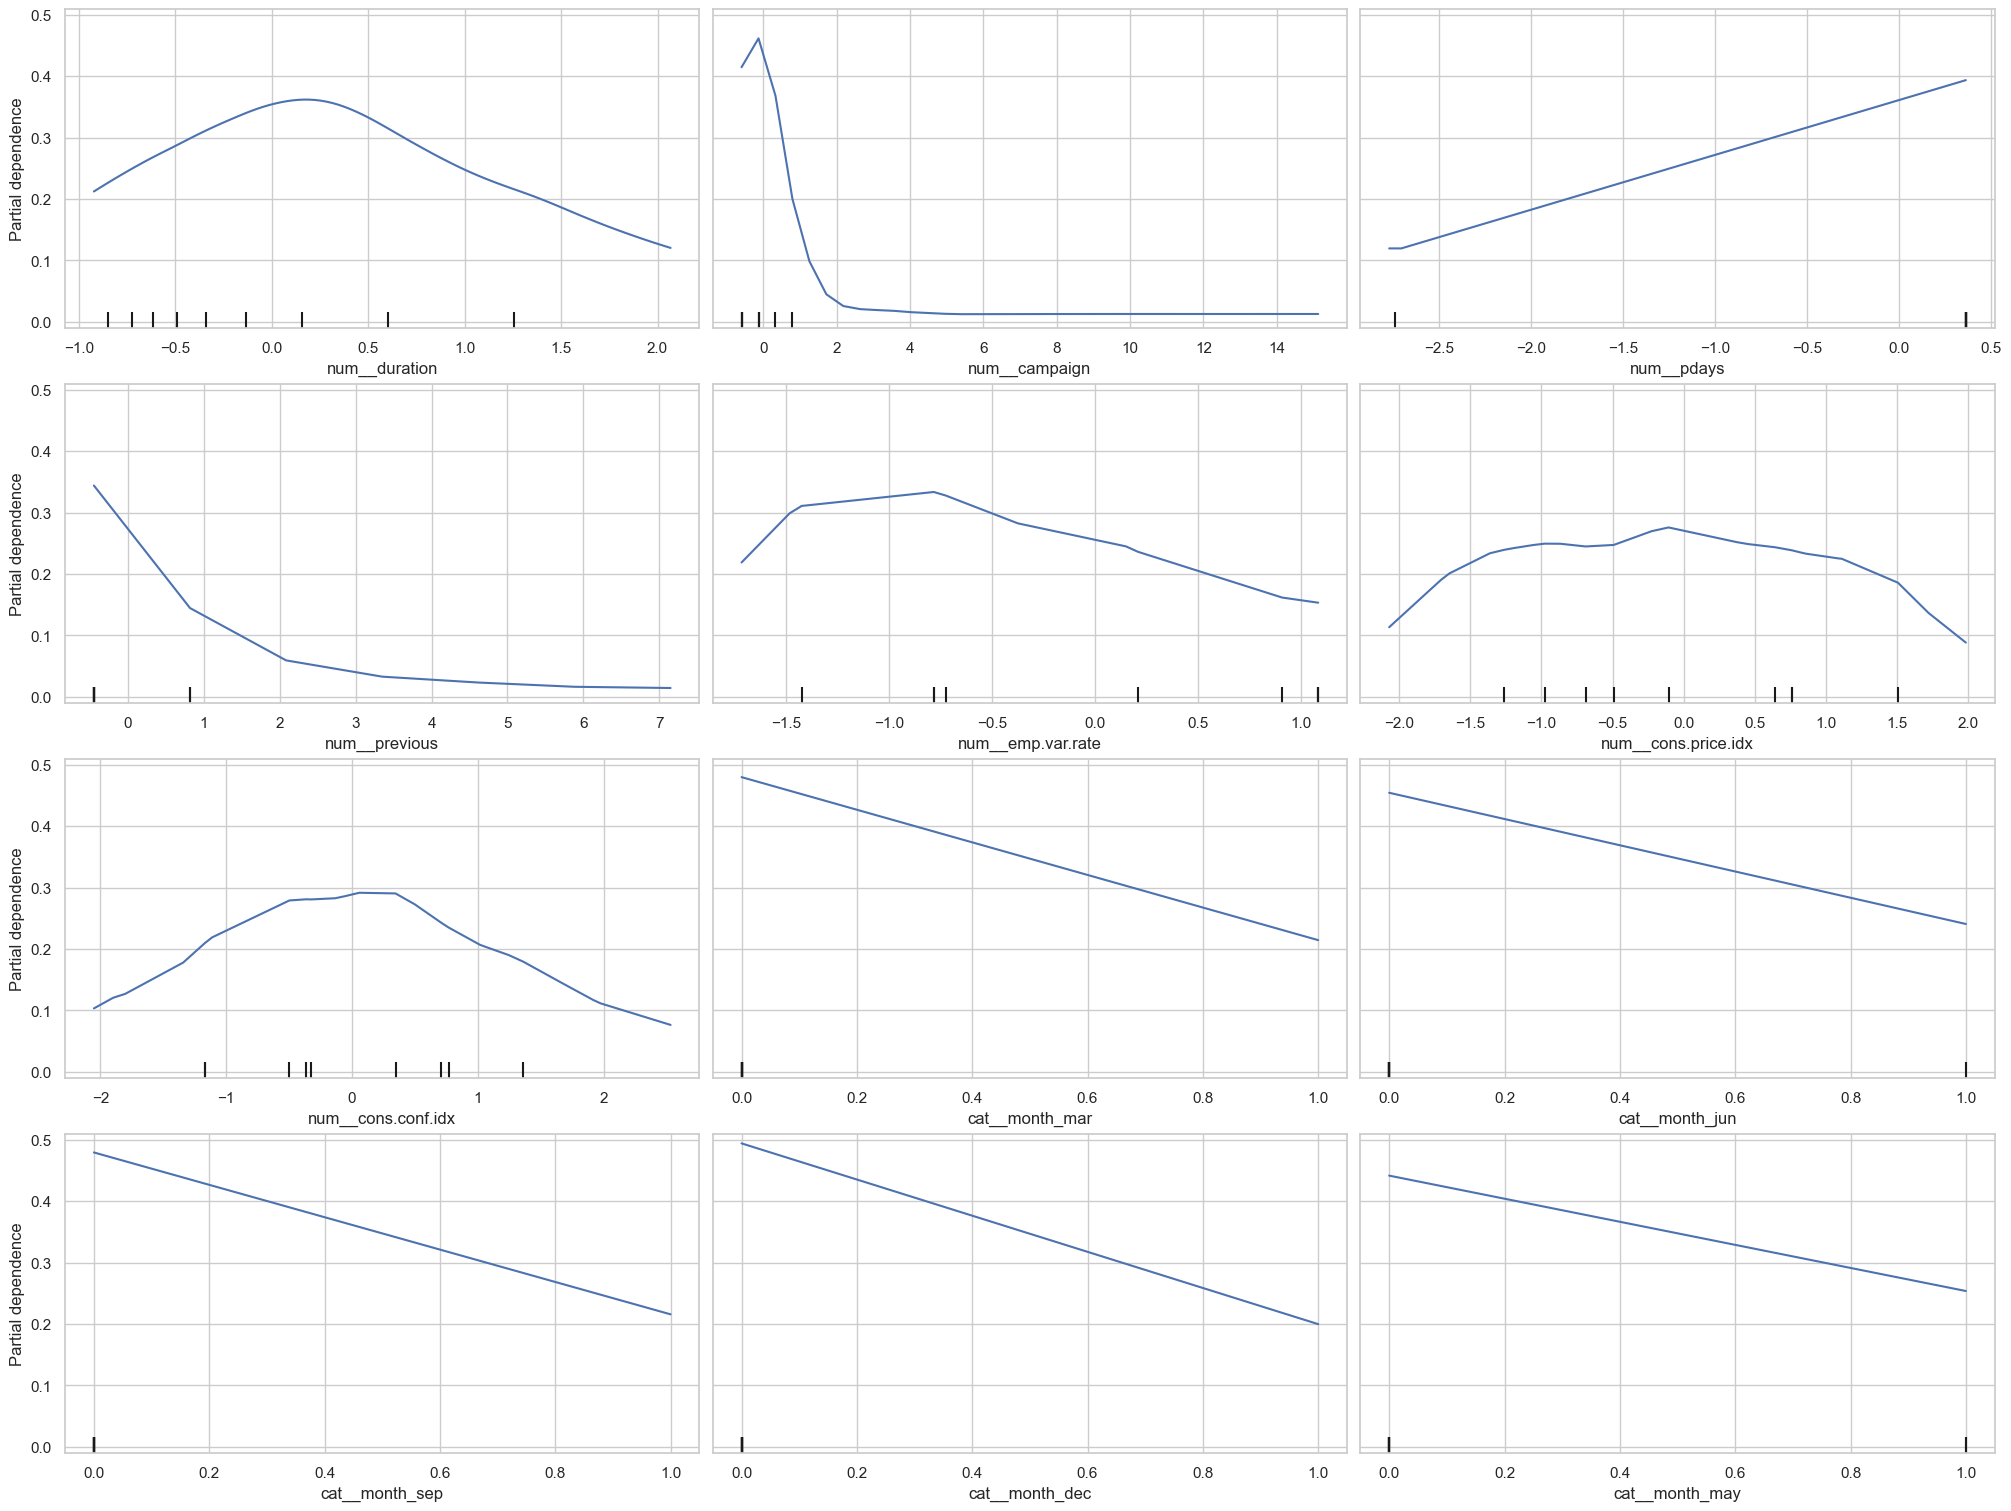

In [41]:

# Get feature names from the preprocessor
feature_names_from_preprocessor = preprocessor.get_feature_names_out()

# Top features including important months
top_features = ['num__duration', 'num__campaign', 'num__pdays', 'num__previous', 'num__emp.var.rate', 
                'num__cons.price.idx', 'num__cons.conf.idx', 'cat__month_mar', 'cat__month_jun', 
                'cat__month_sep', 'cat__month_dec', 'cat__month_may']

# Get the indices of these top features from the preprocessor feature names
top_feature_indices = [np.where(feature_names_from_preprocessor == feature)[0][0] for feature in top_features]

# Print indices to verify
print("Indices of top features:", top_feature_indices)

# Plot PDP for these top features with a larger figure size
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), constrained_layout=True)  # Adjust the layout and figure size
PartialDependenceDisplay.from_estimator(best_svm, X_train, top_feature_indices, feature_names=feature_names_from_preprocessor, grid_resolution=100, ax=ax)
plt.show()

### Observations from PDPs:

1. **Call Duration**: 6-8 minutes boost subscription likelihood.
2. **Campaign Contacts**: Fewer contacts are better.
3. **Days Since Last Contact**: More days increase likelihood.
4. **Previous Contacts**: Fewer previous contacts are better.
5. **Employment Variation Rate**: Higher rates decrease likelihood.
6. **Consumer Price Index**: Moderate values are optimal.
7. **Consumer Confidence Index**: Moderate values are optimal.
8. **Contact Month**: March, June, September, December, and May are less favorable.

### Insights and Business Implications:

1. **Optimal Call Duration**: Keep calls between 6-8 minutes.
2. **Contact Frequency**: Reduce number of contacts.
3. **Re-contact Timing**: Increase days between contacts, re-contact in successful months.
4. **Previous Contacts**: Minimize to avoid fatigue.
5. **Economic Indicators**: Monitor key indices for favorable conditions.
6. **Month of Contact**: Adjust timing based on further data validation.

### Conclusion:

PDPs highlight key strategies to optimize marketing campaigns: focus on optimal call durations, reduce contact frequency, and time re-contacts effectively.

### Month Analysis

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Feature Engineering Suggestions:

1. **Interaction Features**: Combine important features, e.g., call duration and previous contacts.
2. **Temporal Features**: Create a recency of contact feature.
3. **Aggregate Features**: Calculate mean/median call duration.
4. **Binning Features**: Categorize call duration into bins.
5. **Lag Features**: Create features for the time between contacts.
6. **Frequency Encoding**: Encode categorical variables based on their frequency.
7. **Economic Indicators**: Create moving averages for economic indicators.

##### Questions